In [64]:
import pandas as pd

In [138]:
df = pd.read_csv('Time_series_analysis_and_forecast_DATASET.csv')

In [139]:
df

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.21500,3.6900,23.710
1,2010-09-01 01:00:00,15.8,1669.19500,3.6900,22.635
2,2010-09-01 02:00:00,15.8,1491.98000,3.6900,22.565
3,2010-09-01 03:00:00,15.8,1330.76000,3.6900,18.910
4,2010-09-01 04:00:00,15.8,1247.94000,3.6900,18.030
...,...,...,...,...,...
92011,2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925
92012,2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880
92013,2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060
92014,2021-02-28 22:00:00,24.3,694.95150,5.4848,62.000


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


In [140]:
df[ 'FullDate' ] = pd.to_datetime(df[ 'FullDate' ])

In [69]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [70]:
from fbprophet import Prophet

In [80]:
df1 = df[['FullDate','ElecPrice']] #extract selected columns

In [72]:
df1

,FullDate,ElecPrice
0,2010-09-01 00:00:00,23.710
1,2010-09-01 01:00:00,22.635
2,2010-09-01 02:00:00,22.565
3,2010-09-01 03:00:00,18.910
4,2010-09-01 04:00:00,18.030
...,...,...
92011,2021-02-28 19:00:00,117.925
92012,2021-02-28 20:00:00,87.880
92013,2021-02-28 21:00:00,62.060
92014,2021-02-28 22:00:00,62.000


In [81]:
df1 = df1.rename(columns={ "FullDate" : "ds" , "ElecPrice" : "y" })

In [82]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      92016 non-null  datetime64[ns]
 1   y       92016 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.4 MB


In [83]:
df1.set_index('ds', inplace=True)

In [89]:
df.set_index('FullDate', inplace=True)

In [90]:
dfdaily = df.resample( 'D' ).mean()

Text(0, 0.5, 'Passengers')

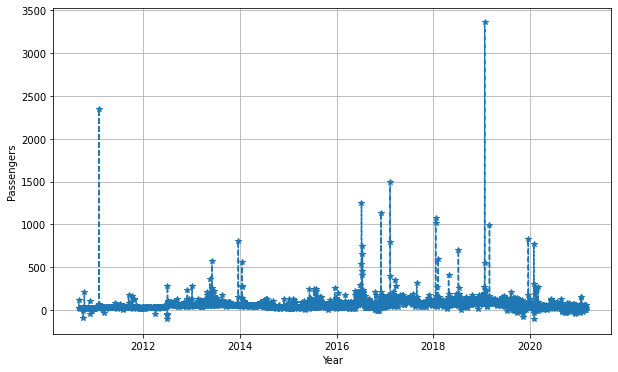

In [86]:
#question 11
import matplotlib.pyplot as plt

plt.figure(figsize=( 10 , 6 ))
plt.plot(df_daily.index, df_daily.y, '--' , marker= '*' , )
plt.grid()
plt.xlabel( 'Year' )
plt.ylabel( 'Passengers' )

In [91]:
#stationarity tests
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(dfdaily[ 'SysLoad' ])
print( f'ADF Statistic: {adf_result[ 0 ]}' )
print( f'p-value: {adf_result[ 1 ]} ' )
print( f'No. of lags used: {adf_result[ 2 ]} ' )
print( f'No. of observations used : {adf_result[ 3 ]} ' )
print( 'Critical Values:' )
for k, v in adf_result[ 4 ].items():
 print( f' {k} : {v} ' ) 

ADF Statistic: -3.6901589888366413
p-value: 0.0042537255045741835 
No. of lags used: 30 
No. of observations used : 3803 
Critical Values:
 1% : -3.432070672988693 
 5% : -2.8623002987378547 
 10% : -2.567174716967499 


In [163]:
#stationariy test
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(dfdaily[ 'ElecPrice' ])
print( f'ADF Statistic: {adf_result[ 0 ]}' )
print( f'p-value: {adf_result[ 1 ]} ' )
print( f'No. of lags used: {adf_result[ 2 ]} ' )
print( f'No. of observations used : {adf_result[ 3 ]} ' )
print( 'Critical Values:' )
for k, v in adf_result[ 4 ].items():
 print( f' {k} : {v} ' ) 

ADF Statistic: -8.269053866873804
p-value: 4.848817773711633e-13 
No. of lags used: 20 
No. of observations used : 3813 
Critical Values:
 1% : -3.432066157296446 
 5% : -2.8622983040036005 
 10% : -2.5671736550459663 


In [92]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(dfdaily[ 'GasPrice' ])
print( f'ADF Statistic: {adf_result[ 0 ]}' )
print( f'p-value: {adf_result[ 1 ]} ' )
print( f'No. of lags used: {adf_result[ 2 ]} ' )
print( f'No. of observations used : {adf_result[ 3 ]} ' )
print( 'Critical Values:' )
for k, v in adf_result[ 4 ].items():
 print( f' {k} : {v} ' ) 

ADF Statistic: -2.902766697165181
p-value: 0.045027212884625294 
No. of lags used: 27 
No. of observations used : 3806 
Critical Values:
 1% : -3.4320693157877544 
 5% : -2.8622996992165364 
 10% : -2.5671743978048323 


In [93]:
df_daily.reset_index(inplace = True)

In [94]:
df_daily

,ds,y
0,2010-09-01,114.654167
1,2010-09-02,23.783750
2,2010-09-03,21.040625
3,2010-09-04,20.928125
4,2010-09-05,20.856458
...,...,...
3829,2021-02-24,26.448750
3830,2021-02-25,24.063125
3831,2021-02-26,60.228958
3832,2021-02-27,20.374167


In [95]:
train_set = df_daily[0:2757].copy()

In [96]:
train_set

,ds,y
0,2010-09-01,114.654167
1,2010-09-02,23.783750
2,2010-09-03,21.040625
3,2010-09-04,20.928125
4,2010-09-05,20.856458
...,...,...
2752,2018-03-15,113.222500
2753,2018-03-16,94.888958
2754,2018-03-17,71.599375
2755,2018-03-18,45.333958


In [97]:
test_set = df_daily[2757:].copy()

In [125]:
test_set

,ds,y
2757,2018-03-20,76.375000
2758,2018-03-21,72.103750
2759,2018-03-22,94.189583
2760,2018-03-23,89.115000
2761,2018-03-24,71.737500
...,...,...
3829,2021-02-24,26.448750
3830,2021-02-25,24.063125
3831,2021-02-26,60.228958
3832,2021-02-27,20.374167


In [99]:
model = Prophet()

In [100]:
model.fit(train_set)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [102]:
forecast = model.predict(test_set.drop(columns="y"))

In [103]:
forecast.head()
forecast[[ 'ds' , 'yhat' ,b 'yhat_lower' , 'yhat_upper' , 'trend' , 'trend_lower' , 'trend_upper' ]]

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2018-03-20,105.534007,3.359964,202.332272,111.989873,111.989873,111.989873
1,2018-03-21,111.923322,11.187668,205.988098,112.023341,112.023341,112.023341
2,2018-03-22,116.048979,21.630799,217.508103,112.056809,112.056809,112.056809
3,2018-03-23,107.388138,4.105991,205.841756,112.090278,112.090278,112.090278
4,2018-03-24,93.855705,-13.003225,190.891813,112.123746,112.123746,112.123746
...,...,...,...,...,...,...,...
1072,2021-02-24,144.136828,14.485248,264.591891,147.867971,78.134775,220.536302
1073,2021-02-25,146.921870,19.449424,270.976041,147.901439,77.991141,220.647083
1074,2021-02-26,137.204411,11.831394,268.642617,147.934908,77.820924,220.753175
1075,2021-02-27,122.897401,-0.750928,247.151873,147.968376,77.651290,220.859268


In [132]:
import numpy as np
#mean average percentage error function
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [127]:
mape(test_set['y'],forecast['yhat'])

546.7921386334766

In [128]:
from sklearn.metrics import mean_squared_error

In [129]:
MSE = mean_squared_error(test_set['y'], forecast['yhat'])

In [131]:
import math
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

133.84386685269325


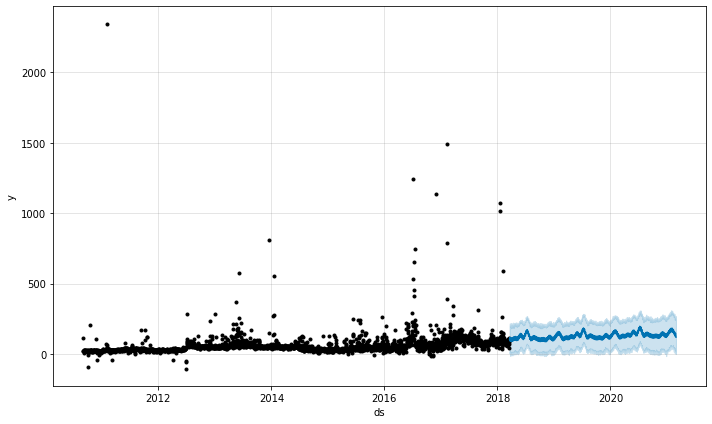

In [104]:
model.plot(forecast)
plt.show()

In [141]:
df2 = df.copy()

In [147]:
df2

,add2,add1,add3,y
ds,,,,
2010-09-01 00:00:00,15.8,1688.21500,3.6900,23.710
2010-09-01 01:00:00,15.8,1669.19500,3.6900,22.635
2010-09-01 02:00:00,15.8,1491.98000,3.6900,22.565
2010-09-01 03:00:00,15.8,1330.76000,3.6900,18.910
2010-09-01 04:00:00,15.8,1247.94000,3.6900,18.030
...,...,...,...,...
2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925
2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880
2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060


In [145]:
df2 = df2.rename(columns={ "FullDate" : "ds" , "ElecPrice" : "y",'Tmax':'add2','SysLoad':'add1','GasPrice':'add3' })

In [148]:
df2.reset_index(inplace = True)

In [149]:
df2.set_index('ds', inplace=True)

In [150]:
df2_daily = df2.resample( 'D' ).mean()

In [151]:
df2_daily

,add2,add1,add3,y
ds,,,,
2010-09-01,15.8,1731.890833,3.6900,114.654167
2010-09-02,15.4,1620.791250,3.6900,23.783750
2010-09-03,18.3,1736.073333,4.4500,21.040625
2010-09-04,13.7,1484.920208,3.3900,20.928125
2010-09-05,14.9,1483.808750,4.4500,20.856458
...,...,...,...,...
2021-02-24,22.4,-63.562394,5.6000,26.448750
2021-02-25,21.6,189.128273,5.4377,24.063125
2021-02-26,22.8,396.542679,5.4242,60.228958


In [152]:
df2_daily.reset_index(inplace = True)

In [153]:
df2_daily

,ds,add2,add1,add3,y
0,2010-09-01,15.8,1731.890833,3.6900,114.654167
1,2010-09-02,15.4,1620.791250,3.6900,23.783750
2,2010-09-03,18.3,1736.073333,4.4500,21.040625
3,2010-09-04,13.7,1484.920208,3.3900,20.928125
4,2010-09-05,14.9,1483.808750,4.4500,20.856458
...,...,...,...,...,...
3829,2021-02-24,22.4,-63.562394,5.6000,26.448750
3830,2021-02-25,21.6,189.128273,5.4377,24.063125
3831,2021-02-26,22.8,396.542679,5.4242,60.228958
3832,2021-02-27,23.5,205.536673,5.4200,20.374167


In [154]:
train_set2 = df2_daily[0:2757].copy()

In [155]:
train_set2

,ds,add2,add1,add3,y
0,2010-09-01,15.8,1731.890833,3.6900,114.654167
1,2010-09-02,15.4,1620.791250,3.6900,23.783750
2,2010-09-03,18.3,1736.073333,4.4500,21.040625
3,2010-09-04,13.7,1484.920208,3.3900,20.928125
4,2010-09-05,14.9,1483.808750,4.4500,20.856458
...,...,...,...,...,...
2752,2018-03-15,25.4,1130.792744,9.1928,113.222500
2753,2018-03-16,27.0,821.269333,9.0400,94.888958
2754,2018-03-17,30.2,44.972794,8.7100,71.599375
2755,2018-03-18,21.2,-170.934915,8.4995,45.333958


In [156]:
test_set2 = df2_daily[2757:].copy()

In [157]:
test_set2

,ds,add2,add1,add3,y
2757,2018-03-20,22.5,320.704637,8.3995,76.375000
2758,2018-03-21,23.8,194.085777,8.4690,72.103750
2759,2018-03-22,30.1,798.407719,8.4690,94.189583
2760,2018-03-23,33.8,753.768098,8.2769,89.115000
2761,2018-03-24,34.7,156.814110,7.5090,71.737500
...,...,...,...,...,...
3829,2021-02-24,22.4,-63.562394,5.6000,26.448750
3830,2021-02-25,21.6,189.128273,5.4377,24.063125
3831,2021-02-26,22.8,396.542679,5.4242,60.228958
3832,2021-02-27,23.5,205.536673,5.4200,20.374167


In [158]:
model2 = Prophet()
model2.add_regressor('add1')
model2.add_regressor('add2')
model2.add_regressor('add3')
model2.fit(train_set2)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [160]:
forecast2 = model2.predict(test_set2.drop(columns="y"))

In [162]:
mape(test_set2['y'],forecast2['yhat'])

236.81987375569506

# New Section